In [1]:
'''
 Title: Classification Models
  Name: Rachael Muriuki
  Date: 16/7/2025
  Description: Building and evaluating various models using supervised machine learning classification models using the Wine dataset from scikit-learn
'''

'\n Title: Classification Models\n  Name: Rachael Muriuki\n  Date: 16/7/2025\n  Description: Building and evaluating various models using supervised machine learning classification models using the Wine dataset from scikit-learn\n'

1.Importing Required Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


2.Loading the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

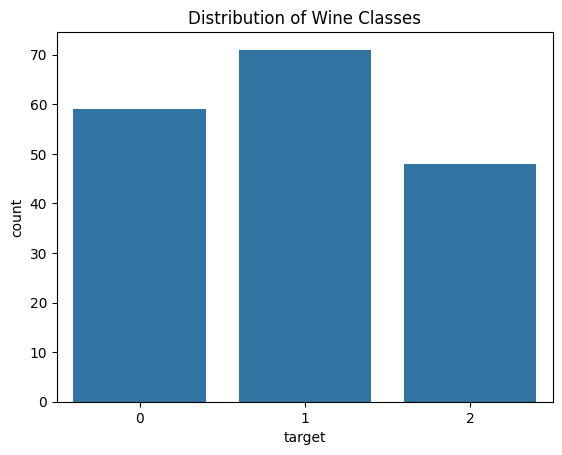

In [3]:
#Load the dataset and convert to DataFrame
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

x.info()
x.describe()

#Check for missing values
print("Missing values:\n", x.isnull().sum())

sns.countplot(x=y)
plt.title("Distribution of Wine Classes")
plt.show()

3.Exploratory Data Analysis

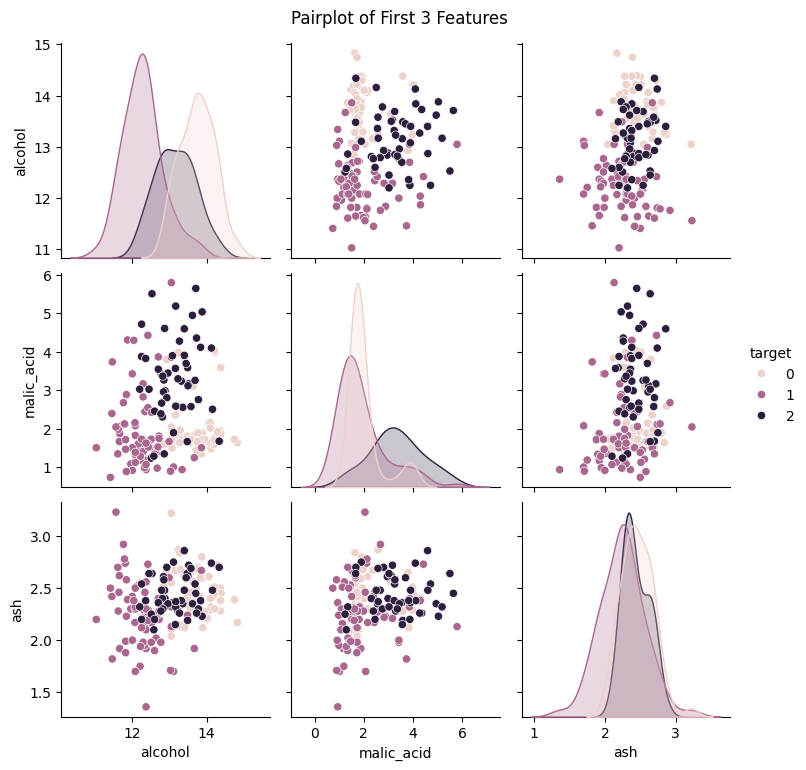

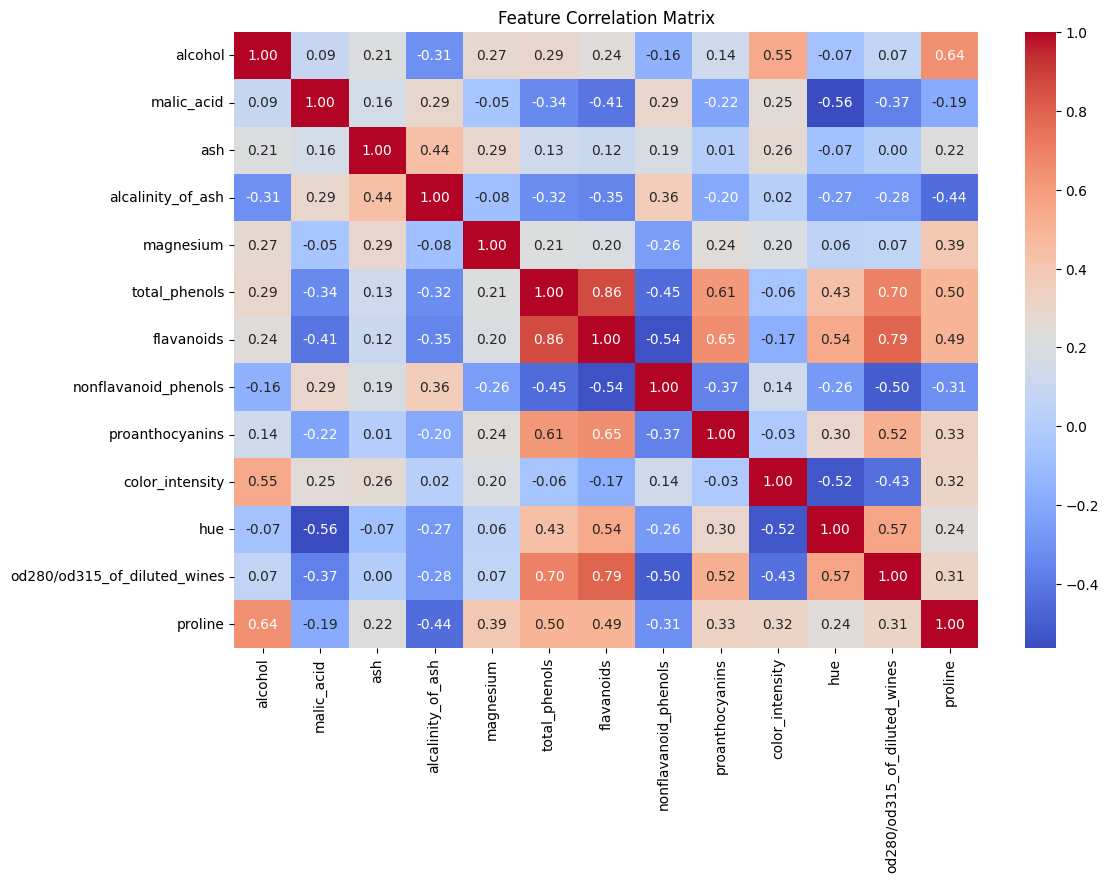

In [4]:
sns.pairplot(pd.concat([x.iloc[:, :3], y], axis=1), hue='target')
plt.suptitle("Pairplot of First 3 Features", y=1.02)
plt.show()

#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

4.Data Processing

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Train/Test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

5.Helper function for confusion matrix plotting

In [6]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

6.Model training and evaluation of the following models;<br>
-Logistic Regression<br>
-Decision Tree<br>
-Random Forest<br>
-k-Nearesr Neighbors (KNN)<br>
-Naive Bayes<br>
-Support Vector Machine(SVM)<br>


 Logistic Regression
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



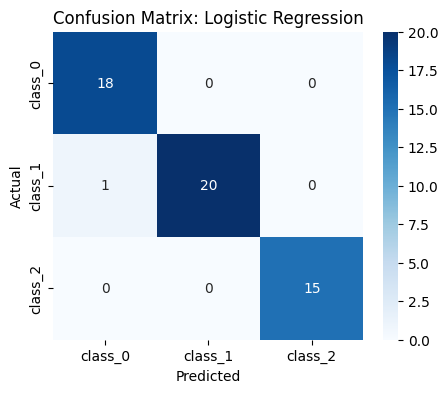


 Decision Tree
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



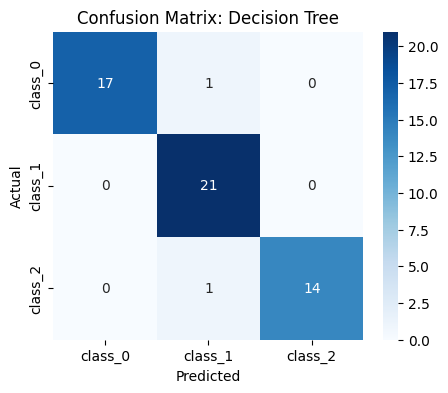


 Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



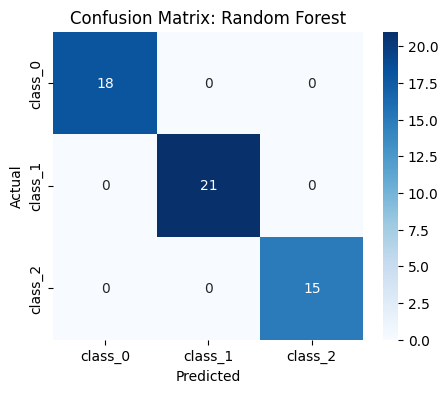


 KNN
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



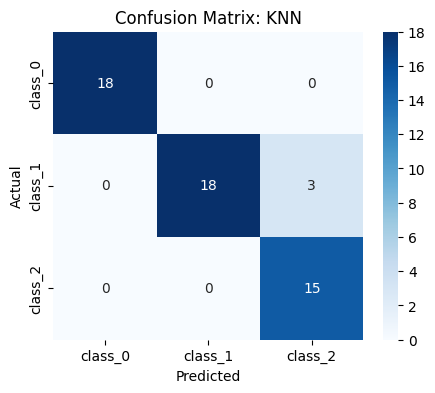


 Naive Bayes
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



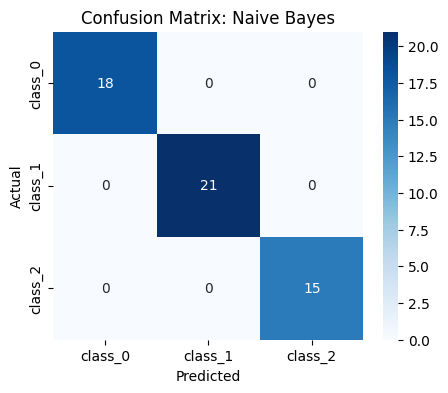


 SVM
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



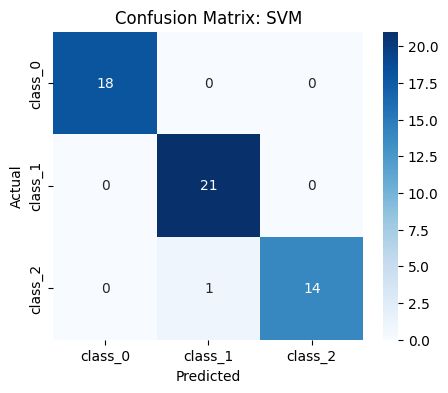

In [7]:
#Store model results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

#Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

#Loop over models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc=accuracy_score(y_test, y_pred)
    print(f"\n {name}")
    print(classification_report(y_test, y_pred, target_names=wine.target_names))
    plot_conf_matrix(y_test, y_pred, name)

#Store results
    results.loc[len(results)] = [name, acc]





7.Comparing Model performance

                 Model  Accuracy
0          Naive Bayes  1.000000
1        Random Forest  1.000000
2                  SVM  0.981481
3  Logistic Regression  0.981481
4        Decision Tree  0.962963
5                  KNN  0.944444


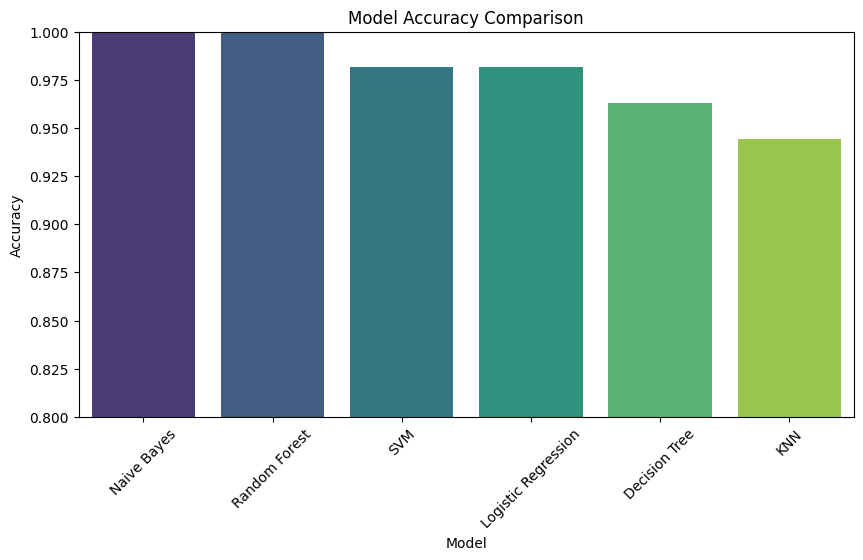

In [8]:
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

#Display Accuracy table
print(results)

#Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()

Naive Bayes show the highest accuracy since it's best fit for this data's shape and distribution and strongest classification reports thus being the best performing model
